# Análisis de los datos de los coordinómetros de la Presa de Chanlud

Esta es la segunda version del programa de conversión y análisis de los datos obtenidos a partir del procesamiento local de las fotografías de los coordinómetros.
En esta version el archivo de texto con las mediciones obtenidas tiene este formato:
| Timestamp | Borde Menor | Borde Mayor | Ancho [pxl] |
| ------------ | ------------ | ------------ | ------------ |
| 2022-01-01T00:00:12 | 232 | 454 | 222 |

## Selección del archivo de texto
Selección del archivo de texto para empezar el análisis y corrección

In [1]:
lado = 'IZQ'
nivel = 'N3'
eje = 'X'
anio = '2022'

Ban_Guardar_Borde_Corregido = 0
Ban_Corregir_Picos = 0

In [2]:
import pandas as pd

# Rutas a los archivos
ruta_archivo_texto = f'C:/Users/RSA-Milton/Desktop/Coordinometros/Fotos/{lado}/{lado}-{nivel}-{eje}/{lado}-{nivel}-{eje}_{anio}.txt'

# Leer el archivo de texto separado por espacion 
df = pd.read_csv(ruta_archivo_texto, sep = ' ', header=None)

# Verificar el número de columnas en el DataFrame
#print(df.head())

# Nombrar las columnas
df.columns = ['Timestamp', 'BordeMenor', 'BordeMayor', 'AnchoPxl']

## Corrección de datos con borde único
Se corrigen los datos en los que se detectó un solo borde tanto para el borde menor como para el mayor

### Obtención del ancho del cable 
Obtiene los valores del ancho del cable para seleccionar el valor óptimo para realizar la corrección

In [3]:
# Asegurarse de que 'AnchoPxl' es numérico y tratar 'null' como NaN
df['AnchoPxl'] = pd.to_numeric(df['AnchoPxl'], errors='coerce')

# Obtener valores únicos diferentes de 'null' de la columna 'Ancho'
valores_unicos = df['AnchoPxl'].dropna().unique()
print("Valores únicos diferentes de 'null' en 'Ancho':", valores_unicos)

# Calcular el valor mínimo y máximo
minimo = valores_unicos.min()
maximo = valores_unicos.max()
print("Valor mínimo en 'AnchoPxl':", minimo)
print("Valor máximo en 'AnchoPxl':", maximo)

# Calcular la diferencia
diferencia = maximo - minimo
print("Diferencia entre el valor máximo y mínimo en 'AnchoPxl':", diferencia)

# Calcular el promedio (media) de la columna 'Ancho'
promedio = df['AnchoPxl'].mean()
print("Promedio de 'AnchoPxl':", promedio)

# Calcular la moda de la columna 'Ancho'
moda = df['AnchoPxl'].mode().iloc[0]
print("Moda de 'AnchoPxl':", moda)

# Define el valor del factor de correccion
factor_coreccion = int(moda)
print("Factor de correccion:", factor_coreccion)

Valores únicos diferentes de 'null' en 'Ancho': [220. 222. 215. 224. 218. 225. 217. 223. 221. 213. 219. 212. 227. 216.
 226. 235. 240. 234. 231. 233. 236. 228. 232. 230. 239. 229. 237. 238.
 247.]
Valor mínimo en 'AnchoPxl': 212.0
Valor máximo en 'AnchoPxl': 247.0
Diferencia entre el valor máximo y mínimo en 'AnchoPxl': 35.0
Promedio de 'AnchoPxl': 229.6259977194983
Moda de 'AnchoPxl': 234.0
Factor de correccion: 234


Calcula el punto medio del cable en funcion del minimo valor del borde menor y el maximo valor del borde mayor:

In [4]:
# Asegurarse de que 'BordeMenor' y 'BordeMayor' sean numérico
df['BordeMenor'] = pd.to_numeric(df['BordeMenor'], errors='coerce')
df['BordeMayor'] = pd.to_numeric(df['BordeMayor'], errors='coerce')

# Calcular el valor mínimo de la columna 'BordeMenor'
borde_minimo = df['BordeMenor'].min()
# Calcular el valor maximo de la columna 'BordeMayor'
borde_maximo = df['BordeMayor'].max()

# Calcular el punto medio del cable
mitad_cable= ((borde_maximo-borde_minimo)/2)
punto_medio = borde_minimo + mitad_cable

print("Valor mínimo del borde:", borde_minimo)
print("Valor maximo del borde':", borde_maximo)
print("Punto medio del cable':", punto_medio)

Valor mínimo del borde: 165.0
Valor maximo del borde': 475.0
Punto medio del cable': 320.0


- Corrige los valores del Borde Menor que sean mayores al punto medio del cable.
- Corrige los valores del Borde Mayor que sean menores al punto medio del cable.
- Actualiza los valores del ancho del cable

In [5]:
# Restar 'factor_correccion' a los elementos de 'BordeMenor' mayores a 'punto_medio'
df.loc[df['BordeMenor'] > punto_medio, 'BordeMenor'] -= factor_coreccion
# Sumar 'factor_correccion' a los elementos de 'BordeMayor' menores a 'punto_medio'
df.loc[df['BordeMayor'] < punto_medio, 'BordeMayor'] += factor_coreccion

# Actualizar los valores de 'Ancho' como la diferencia entre 'BordeMayor' y 'BordeMenor'
df['AnchoPxl'] = df['BordeMayor'] - df['BordeMenor']

## Gráfica de datos corregidos

In [6]:
import matplotlib.pyplot as plt
# Función para graficar los datos
def graficar_datos(columna):
    # Graficar
    plt.figure(figsize=(20, 6))
    plt.plot(df['Timestamp'], df[columna], label=columna)
    plt.xlabel('Tiempo')
    plt.ylabel(columna)
    plt.title(f'Gráfico de {columna} a lo largo del año {anio}')
    plt.legend()
    plt.show()

In [7]:

#graficar_datos('BordeMenor')
#graficar_datos('BordeMayor')

## Guardar los datos corregidos en formato CSV

In [8]:

if (Ban_Guardar_Borde_Corregido==1):
    # Guardar el archivo en formato CSV
    ruta_archivo_csv = f'C:/Users/RSA-Milton/Desktop/Coordinometros/Fotos/{lado}/{lado}-{nivel}-{eje}/CSV/{lado}-{nivel}-{eje}_{anio}.csv'
    # Seleccionar solo las columnas deseadas para guardar
    columnas_a_guardar = ['Timestamp', 'BordeMenor', 'BordeMayor', 'AnchoPxl']
    df_filtrado = df[columnas_a_guardar]

    # Guardar el DataFrame filtrado en formato CSV
    df_filtrado.to_csv(ruta_archivo_csv, index=True, header=True)


# Cálculo de la posición del cable 

Se calcula la posicion del punto medio del cable en milímetros

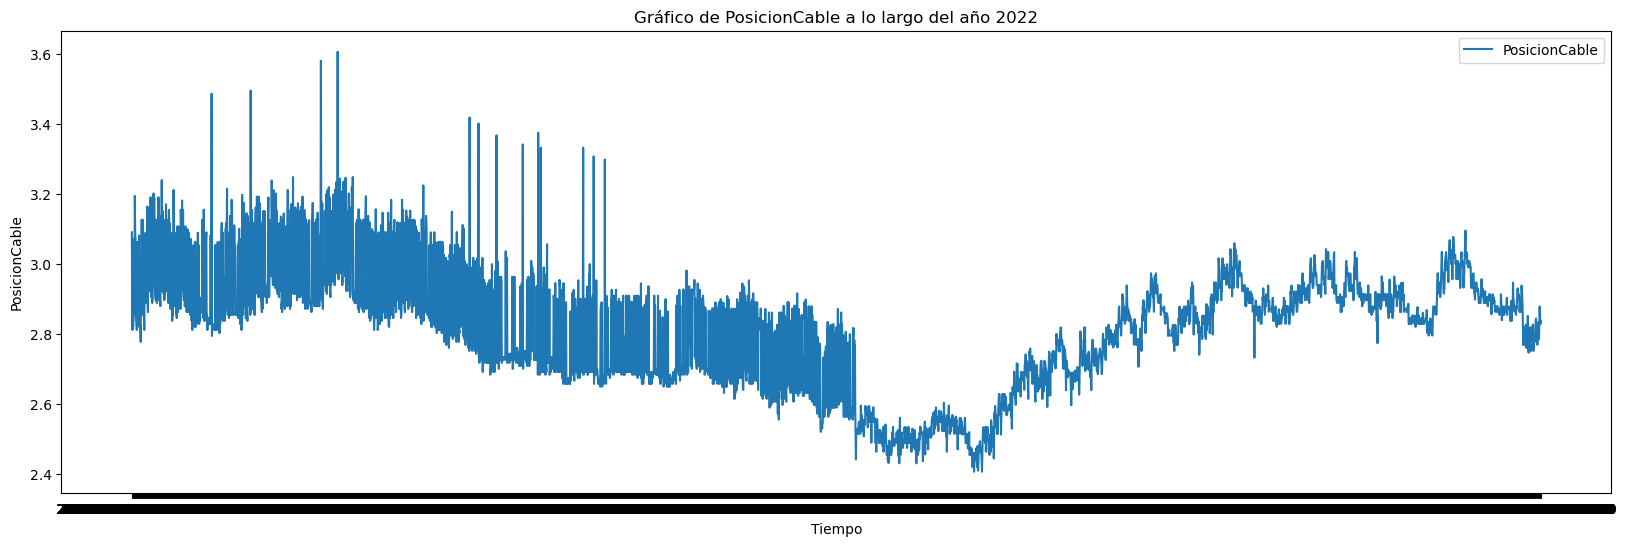

In [9]:
df['PosicionCable'] = ((df['BordeMayor']+df['BordeMenor'])/df['AnchoPxl']).round(3)
graficar_datos('PosicionCable')

# Corrección de picos

Corrige los valores atipicos que sobresalen de la gráfica

In [10]:
Ban_Corregir_Picos = 0

if (Ban_Corregir_Picos==1):
    
    # Parámetros para la corrección 
    limiteSuperior = 3.0
    limiteInferior = 2.5 
    factorCorreccion = 0.32

    # Aplicar corrección
    df.loc[(df['PosicionCable'] > limiteInferior) & (df['PosicionCable'] < limiteSuperior), 'PosicionCable'] += factorCorreccion
    #df.loc[(df['PosicionCable'] > limiteInferior) & (df['PosicionCable'] < limiteSuperior), 'PosicionCable'] = df['PosicionCable'].shift(1)

    graficar_datos('PosicionCable')




In [11]:
Ban_Guardar_Resultado = 1

if (Ban_Guardar_Resultado==1):
    # Guardar el archivo en formato CSV
    ruta_archivo_csv = f'C:/Users/RSA-Milton/Desktop/Coordinometros/Fotos/{lado}/{lado}-{nivel}-{eje}/Resultado/{lado}-{nivel}-{eje}_{anio}.csv'
    # Seleccionar solo las columnas deseadas para guardar
    columnas_a_guardar = ['Timestamp', 'PosicionCable']
    df_filtrado = df[columnas_a_guardar]

    # Guardar el DataFrame filtrado en formato CSV
    df_filtrado.to_csv(ruta_archivo_csv, index=True, header=True)
